In [3]:
# Import the libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
print("Libraries imported...")

Libraries imported...


In [4]:
# load the data
PATH = '/Users/marcoszavalatorres/Documents/DS/save_the_bees'
df = pd.read_csv(os.path.join(PATH,f'save_the_bees.csv'))

# Create a usable time feature
df['year'] = df['year'].astype(str)
df['quarter'] = df['quarter'].astype(str)
df['time'] = df['year'] + '-' + df['quarter']

# Rename a column
df.rename(columns={'other_pests_and_parasites': 'other_pests'}, inplace=True)
print("data loaded...")

data loaded...


In [6]:

import pandas as pd
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "Other": "OTHER",
    "United States": "USA",
}

# Adding a new 'state_code' column to the DataFrame
df['state_code'] = df['state'].map(us_state_to_abbrev)
print("Created state codes...")

Created state codes...


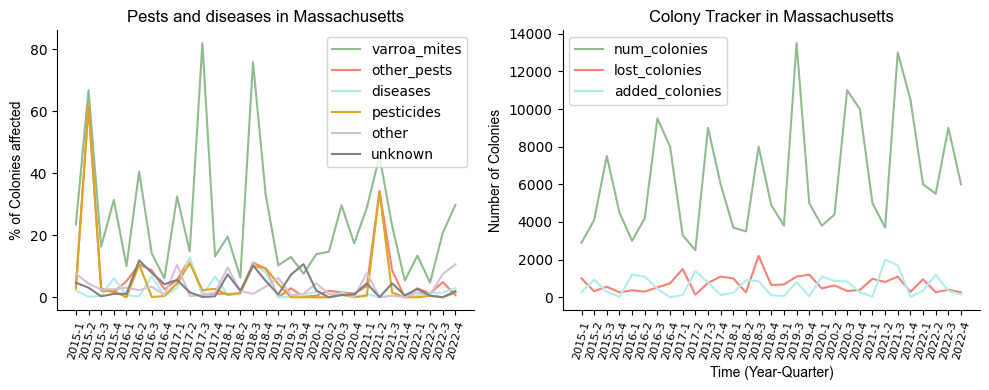

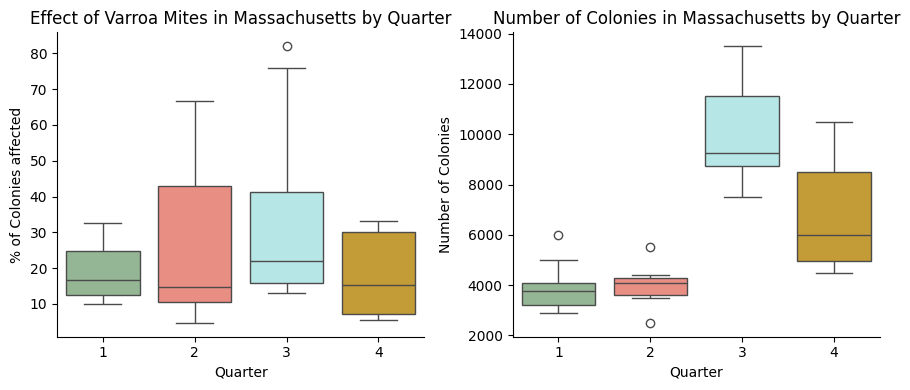

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

class BeeDataVisualizer:
    def __init__(self, df):
        self.df = df

    def line_plots(self, state):
        columns_to_plot_pest = ['varroa_mites', 'other_pests', 'diseases', 'pesticides', 'other', 'unknown']
        columns_to_plot_colony = ['num_colonies', 'lost_colonies', 'added_colonies']
        custom_palette = ['darkseagreen', 'salmon', 'paleturquoise', 'goldenrod', 'thistle', 'gray']

        df_state = self.df[self.df['state'] == state]

        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100, sharex=True)

        # Plot pests and diseases
        for i, column in enumerate(columns_to_plot_pest):
            axes[0].plot(df_state['time'], df_state[column], linestyle='-', color=custom_palette[i], label=column)

        axes[0].set_title(f'Pests and diseases in {state}', fontname='Arial')
        axes[0].set_ylabel('% of Colonies affected', fontname='Arial')
        axes[0].legend()
        axes[0].grid(False)
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)
        axes[0].tick_params(axis='x', rotation=75, labelsize=8) 

        # Plot colony tracker
        for i, column in enumerate(columns_to_plot_colony):
            axes[1].plot(df_state['time'], df_state[column], linestyle='-', color=custom_palette[i], label=column)

        axes[1].set_title(f'Colony Tracker in {state}', fontname='Arial')
        axes[1].set_xlabel('Time (Year-Quarter)', fontname='Arial')
        axes[1].set_ylabel('Number of Colonies', fontname='Arial')
        axes[1].legend()
        axes[1].grid(False)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)
        axes[1].tick_params(axis='x', rotation=75, labelsize=8) 

        # Adjust layout and show the plots
        plt.tight_layout()
        sns.despine()
        plt.show()

    def box_plots(self, state):
        # Filter rows where state is the specified state
        df_state = self.df[self.df['state'] == state]
        custom_palette = ['darkseagreen', 'salmon', 'paleturquoise', 'goldenrod', 'thistle', 'gray']

        # Create subplots with 1 row and 2 columns
        fig, axes = plt.subplots(1, 2, figsize=(9, 4), dpi=100)

        # Create a boxplot for 'varroa_mites'
        sns.boxplot(x='quarter', y='varroa_mites', data=df_state, palette=custom_palette, ax=axes[0])
        axes[0].set_title(f'Effect of Varroa Mites in {state} by Quarter')
        axes[0].set_xlabel('Quarter')
        axes[0].set_ylabel('% of Colonies affected')
        axes[0].grid(False)
        axes[0].spines['top'].set_visible(False)
        axes[0].spines['right'].set_visible(False)

        # Create a boxplot for 'num_colonies'
        sns.boxplot(x='quarter', y='num_colonies', data=df_state, palette=custom_palette, ax=axes[1])
        axes[1].set_title(f'Number of Colonies in {state} by Quarter')
        axes[1].set_xlabel('Quarter')
        axes[1].set_ylabel('Number of Colonies')
        axes[1].grid(False)
        axes[1].spines['top'].set_visible(False)
        axes[1].spines['right'].set_visible(False)

        # Adjust layout and show the plots
        plt.tight_layout()
        plt.show()

visualizer = BeeDataVisualizer(df)

visualizer.line_plots('Massachusetts')
visualizer.box_plots('Massachusetts')

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None